In [5]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random as rand
import cv2
np.set_printoptions(suppress=True)

x_digit = idx2numpy.convert_from_file('data/train-images-idx3-ubyte')
y_digit = idx2numpy.convert_from_file('data/train-labels-idx1-ubyte')

print(x_digit.shape, y_digit.shape)
BATCH_SIZE = 256
TEST_SIZE = 10000
EPOCHS = 50
OUTER_IMG_SZ = 512

(60000, 28, 28) (60000,)


In [4]:
### Generate train and test data using mnist set with NUM_SIZE digits
GRID_SIDE = 9

image_dict = [[] for i in range(10)]
for digit,image in zip(y_digit, x_digit):
    image_dict[digit].append(image)

In [7]:
class SudokuPuzzleGenerator(keras.utils.Sequence):
    
    def __init__(self, length_of_set, batch_size=BATCH_SIZE):
        self.batch_size = batch_size
        self.length_of_set = length_of_set
        self.epoch_count = 0.0
    
    def __len__(self):
        'Denotes the number of batches per epoch 10k/128'
        ret = self.length_of_set // self.batch_size
        #print("Returning length as " + str(ret))
        return ret

    def __getitem__(self, index):
        'Generate one batch of data'
        #print("Getting item for index " + str(index))
        # Generate indexes of the batch
        #print("using batch_size " + str(self.batch_size))
        x, y = self.gen_test_data(self.batch_size)
        #print("Shapes of returned ", x.shape, y.shape)
        ys = {}
        for op_l in range(GRID_SIDE**2):
            ys[op_l] = y[:,op_l,:]
        return x,ys
    
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.epoch_count += 1.0
        #print("An epoch ended >>>>>>> xxxxxxx >>>>>> qqq >>>>")
    
    def gen_test_data(self, num_data):
        x_data, y_data = np.zeros((num_data, OUTER_IMG_SZ , OUTER_IMG_SZ)), np.zeros((num_data, GRID_SIDE **2))
        for i in range(num_data):
            #pick a random size so that the grid is at least 50% of the overall image
            border_sz = rand.randint(1,2)
            digit_sz = rand.randint(OUTER_IMG_SZ//(2 * GRID_SIDE), OUTER_IMG_SZ//GRID_SIDE) - 2 * border_sz
            border_digit_sz  = digit_sz + 2 * border_sz
            grid_size = GRID_SIDE * (border_digit_sz)
            #pick random offsets so image doesn't go off screen
            x_offset = rand.randint(0, OUTER_IMG_SZ - grid_size)
            y_offset = rand.randint(0, OUTER_IMG_SZ - grid_size)
            for k in range(GRID_SIDE**2):
                rand_digit = rand.randint(0,9)
                rand_img = rand.choice(image_dict[rand_digit])
                rand_img = cv2.resize(rand_img, (digit_sz, digit_sz))
                if rand_digit == 0 : rand_img = np.zeros((digit_sz, digit_sz))
                rand_img = cv2.copyMakeBorder(rand_img, border_sz,border_sz,border_sz,border_sz, cv2.BORDER_CONSTANT, value = [255,255,255])
                y_data[i,k] = rand_digit
                r = k//GRID_SIDE
                c = k % GRID_SIDE
                x_data[i, y_offset + r*border_digit_sz:y_offset + (r+1)*border_digit_sz, x_offset + border_digit_sz*c:x_offset + border_digit_sz*(c+1)] = rand_img
        x_data /= 255.0
        y_data = tf.one_hot(y_data, 10).numpy()
        return x_data, y_data
    

(512, 512)


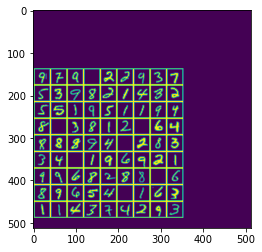

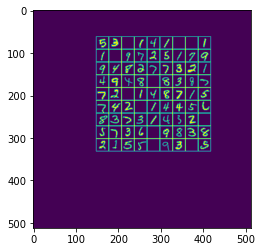

In [45]:
gen = SudokuPuzzleGenerator(1)
x,y = gen.gen_test_data(2)
print(x[0].shape)
plt.imshow(x[0])
plt.show()
plt.imshow(x[1])
img1, img2 = x

(512, 512, 1)


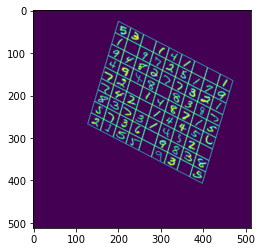

In [55]:
fimg = img2.reshape(512, 512,1)
fimg = fimg * 0.1
dgen = tf.keras.preprocessing.image.ImageDataGenerator()
iim = dgen.apply_transform(fimg, {'shear':15, 'theta' : 15})
print(iim.shape)
plt.imshow(iim)
plt.show()
temp = iim.reshape(512, 512)

In [2]:
def init_solver():
    digit_recognizer = tf.keras.models.load_model('models/mnist_model')
    return digit_recognizer

In [ ]:
def guess_digit

In [ ]:
def sliding_window_tester(puzzle, oh_solution, digit_recognizer):
    # the smallest puzzle can be 30% the size of the image so 30% of 512/9
    top_y, left_x = 0, 0
    current_stride = 1
    window_size_range = (27,28)#(18,58)
    for window in range(window_size_range):
        bottom_y += top_y + window
        right_x += left_x + window
        while bottom_y <= 512 && right_x <= 512:
            sliced_window = puzzle[top_y:bottom_y,left_x:right:x]
            left_x += current_stride
            if left_x + window > 512:
                left_x = 0
                top_y += current_stride
                
        

In [ ]:
inp = iim.reshape(512, 512)
